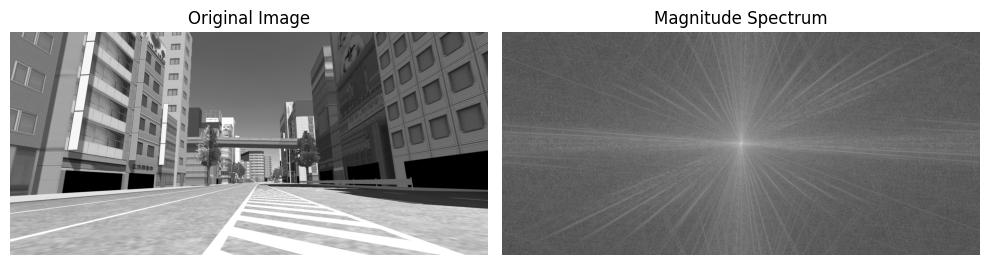

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift
from PIL import Image

# PNG画像の読み込み
image_path = "JumpVE.png"  # 解析したいPNGファイルのパス
image = Image.open(image_path).convert("L")  # グレースケール化
image_array = np.array(image)

# フーリエ変換
fft_result = fft2(image_array)
fft_shifted = fftshift(fft_result)  # 周波数を中心化

# 振幅スペクトルの計算
magnitude_spectrum = np.log(np.abs(fft_shifted) + 1)

# プロット
plt.figure(figsize=(10, 5))

# 元の画像
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_array, cmap="gray")
plt.axis("off")

# フーリエ変換の振幅スペクトル
plt.subplot(1, 2, 2)
plt.title("Magnitude Spectrum")
plt.imshow(magnitude_spectrum, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()

In [7]:
import numpy as np
import cv2
from scipy.fft import fft2, fftshift

# PNG画像の読み込み
image_path = "JumpVE.png"  # 解析したいPNGファイルのパス
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    raise FileNotFoundError(f"Image not found at path: {image_path}")

# フーリエ変換
fft_result = fft2(image)
fft_shift = fftshift(fft_result)

# パワースペクトル
power_spectrum = np.abs(fft_shift)**2

# 正規化
normalized_spectrum = power_spectrum / np.max(power_spectrum)

# ランダムドット用のデータを生成
threshold = 0.1  # 閾値
dot_positions = np.argwhere(normalized_spectrum > threshold)  # 強い周波数成分を抽出
dot_weights = normalized_spectrum[dot_positions[:, 0], dot_positions[:, 1]]  # インデックスに基づいて値を取得

# 保存
output_file = "dot_data.csv"
np.savetxt(
    output_file,
    np.hstack((dot_positions, dot_weights[:, None])),  # 座標と重みを結合
    delimiter=",",
    fmt="%.6f",  # 小数点以下6桁の精度
    header="y,x,weight",  # CSVヘッダー
    comments=""  # ヘッダー行の前に#を付けない
)

print(f"Dot data saved to {output_file}")



Dot data saved to dot_data.csv


In [21]:
import numpy as np
import cv2
from scipy.fft import fft2, fftshift

# 画像を読み込む
image_path = "JumpVE.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if image is None:
    raise ValueError(f"Failed to load image. Check if the file path is correct: {image_path}")

# 画像の次元を確認
print(f"Image shape: {image.shape}")

# フーリエ変換
fft_result = fft2(image)
fft_shift = fftshift(fft_result)

# パワースペクトル
power_spectrum = np.abs(fft_shift)**2

# 正規化
normalized_spectrum = power_spectrum / np.max(power_spectrum)

# 閾値を設定して強い成分を抽出
threshold = 0.01
dot_positions = np.argwhere(normalized_spectrum > threshold)
dot_weights = normalized_spectrum[dot_positions[:, 0], dot_positions[:, 1]]

# 3次元空間用のz座標をランダムに追加
z_positions = np.random.uniform(low=-10, high=10, size=dot_positions.shape[0])

# 3次元データを作成 (x, y, z, weight)
dot_data = np.hstack((dot_positions, z_positions[:, None], dot_weights[:, None]))

# CSVに保存
np.savetxt("dot_data.csv", dot_data, delimiter=",", fmt="%.6f")


Image shape: (895, 1918)


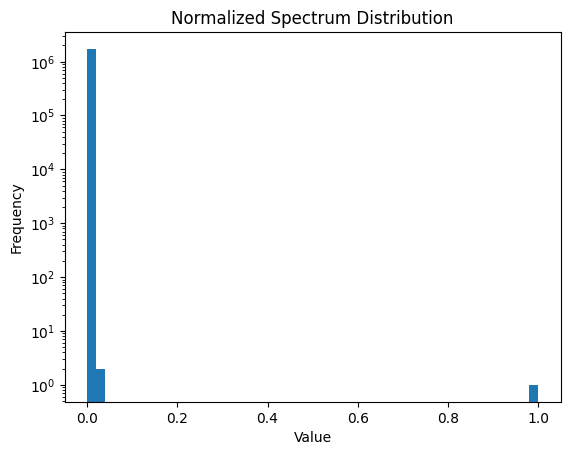

In [12]:
# 正規化後のスペクトル値の分布を確認
import matplotlib.pyplot as plt

plt.hist(normalized_spectrum.ravel(), bins=50, log=True)
plt.title("Normalized Spectrum Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


In [19]:
import numpy as np
import cv2
from scipy.fft import fft2, fftshift
import matplotlib.pyplot as plt

# フーリエ変換
fft_result = fft2(image)                # 2Dフーリエ変換
fft_shift = fftshift(fft_result)        # 低周波成分を中心に移動

# パワースペクトル
power_spectrum = np.abs(fft_shift)**2   # 強度（パワー）の計算

# 正規化
normalized_spectrum = power_spectrum / np.max(power_spectrum)

# 閾値でフィルタリング（強い周波数成分を抽出）
threshold = 0.001
strong_freqs = np.argwhere(normalized_spectrum > threshold)
strengths = normalized_spectrum[strong_freqs[:, 0], strong_freqs[:, 1]]

# 周波数成分と強度を出力
frequency_data = np.hstack((strong_freqs, strengths[:, None]))
np.savetxt("frequency_data.csv", frequency_data, delimiter=",", fmt="%.6f")

# 結果を確認
print(f"Extracted {len(frequency_data)} frequency components.")


Extracted 19 frequency components.


In [20]:
import numpy as np

# 解析で得た周波数データを読み込む
frequency_data = np.loadtxt("frequency_data.csv", delimiter=",")
num_dots_per_frequency = 100  # 各周波数成分ごとに生成するドットの数

# ランダムドットを生成
dots = []
for freq in frequency_data:
    u, v, strength = freq
    for _ in range(num_dots_per_frequency):
        x = u + np.random.uniform(-5, 5)  # u周りのランダムズレ
        y = v + np.random.uniform(-5, 5)  # v周りのランダムズレ
        z = np.random.uniform(0, 100)   # z座標
        dots.append([x, y, z, strength])

# 結果を保存
dots = np.array(dots)
np.savetxt("random_dots.csv", dots, delimiter=",", fmt="%.6f")
